In [2]:
#Load documents from path
import os.path as pth
dir = '/home/jovyan/work/'
document = []
document.append("")
pers_max = 76

for pers in range(1, pers_max + 1):
    name = dir + "/depos-final/" + str("{:02d}".format(pers)) + ".txt"
    if (pth.isfile(name)):
        file = open(name, "rt")
        data = file.read()
        document.append(data)

In [9]:
#Most frequent verbs
from nltk.util import bigrams, trigrams, ngrams   
from nltk import word_tokenize
from nltk import pos_tag
from nltk import FreqDist
from operator import itemgetter

depos_max = 76
result = {}

for i in range(1, depos_max + 1):
    postagged = pos_tag(word_tokenize(document[i].lower()))
    verbs = filter(lambda w: w[1][0] == 'V' and w[1][1] == 'B', postagged)
    
    for verb in list(verbs):
        token = verb[0]
        if token not in result:
            result[token] = 0
        else:
            result[token] += 1
            
for word in (sorted(result.items(), key = itemgetter(1), reverse = True)[:300]):
    print (word[0], word[1])    

said 3605
was 1350
had 1158
did 577
asked 511
saw 501
were 466
heard 432
is 292
saying 291
adored 244
see 227
does 209
been 193
came 182
believes 177
brought 168
have 165
know 156
attested 154
wrote 145
questioned 140
went 136
be 134
told 133
| 132
took 124
has 122
knew 113
sworn 111
added 110
received 102
called 100
go 98
living 97
gave 97
died 94
come 89
answered 87
left 86
hereticated 85
made 84
seen 83
give 79
wanted 78
returned 78
believed 76
say 76
sent 76
found 74
adore 74
lives 70
replied 66
adoring 56
are 55
blessed 54
going 53
visited 53
lived 52
spoke 50
do 50
captured 47
recall 47
wished 46
confessed 46
believe 46
stayed 45
done 45
having 44
remember 41
william 40
containing 39
[ 39
kept 39
given 39
send 39
concerning 37
taken 36
abjured 35
asking 31
tell 30
take 29
hear 29
speak 29
receive 29
used 29
ramfred 29
fled 28
knight 28
named 27
says 27
make 27
seventy 26
arnold 26
saved 25
stated 25
accompanied 25
summoned 25
according 24
peter 24
knows 24
raymond 24
afterwards 2

[1, 6, 0, 6, 0, 6, 0, 0, 18, 1, 0, 4, 1, 0, 2, 2, 16, 15, 17, 4, 6, 1, 6, 0, 0, 4, 1, 5, 1, 1, 0, 1, 1, 1, 4, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 18, 0, 19, 5, 1, 1, 56, 0, 2, 0, 0, 6, 28, 6, 16, 2, 1, 3, 3, 0, 26, 7, 9]


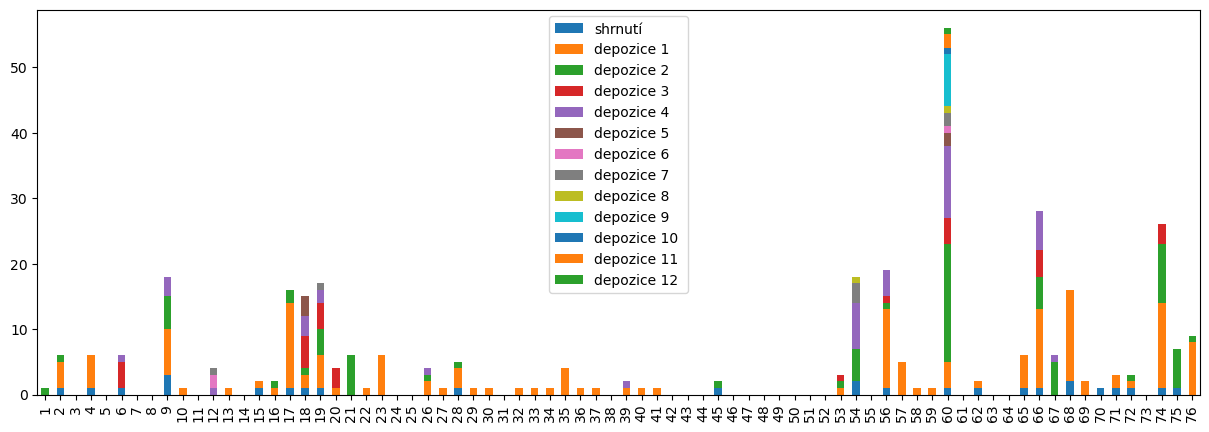

In [14]:
#Find specific pattern (e.g. verb adore) in the text and visualize its distribution
import os.path as pth
import pandas as pd
import re

dir = '/home/jovyan/work/'
pattern = "adore"

pers_max = 76
depos_max = 12

index = []
counts = []
total = []
total.append(0)

for pers in range(1, pers_max + 1):
    index.append(pers);
    total.append(pers);
    total[pers] = 0

for depos in range(0, depos_max + 1):
    counts.append([])
    for pers in range(1, pers_max + 1):
        name = dir + "/depos-final/" + str("{:02d}".format(pers)) + "-" + str("{:02d}".format(depos)) + ".txt"        
        if (pth.isfile(name)):
            file = open(name, "rt")
            text = file.read().lower()
            result = re.finditer(pattern, text)
            indices = [m.start(0) for m in result]
            counts[depos].append(len(indices))
        else:
            counts[depos].append(0)
                       
df = pd.DataFrame({'shrnutí': counts[0],
                   'depozice 1 ': counts[1],
                   'depozice 2 ': counts[2],
                   'depozice 3 ': counts[3],
                   'depozice 4 ': counts[4],
                   'depozice 5 ': counts[5],
                   'depozice 6 ': counts[6],
                   'depozice 7 ': counts[7],
                   'depozice 8 ': counts[8],
                   'depozice 9 ': counts[9],
                   'depozice 10 ': counts[10],
                   'depozice 11 ': counts[11],
                   'depozice 12 ': counts[12],
                  }, index = index)

for depos in range(0, depos_max + 1): 
    for pers in range(0, pers_max):
        total[pers] += counts[depos][pers]
        
total.pop()
print(total)
dfx = pd.DataFrame(total)

df.plot.bar(stacked=True, figsize=(15, 5))
df.describe()
df.to_excel('Graph4.xlsx', engine='openpyxl', index=False)